### Online Retail Data Set

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

### Attribute Information:

InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

Description: Product (item) name. Nominal.

Quantity: The quantities of each product (item) per transaction. Numeric.

InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.

UnitPrice: Unit price. Numeric, Product price per unit in sterling.

CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

Country: Country name. Nominal, the name of the country where each customer resides. 

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import datetime

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import to_graphviz, plot_importance

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.2)


from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score


#import feature_engine.missing_data_imputers as mdi
#from feature_engine.outlier_removers import Winsorizer

#from imblearn.under_sampling import RandomUnderSampler
#from imblearn.over_sampling import RandomOverSampler
#from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

import pickle
from pickle import dump, load

np.random.seed(0)

#from pycaret.classification import *
#from pycaret.clustering import *
#from pycaret.regression import *

pd.set_option('display.max_columns',100)
#pd.set_option('display.max_rows',100)
pd.set_option('display.width', 1000)

### Data Exploration and Analysis

In [2]:
df = pd.read_csv("Online Retail.csv", parse_dates=["InvoiceDate"])

In [3]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,12680.0,France


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
first,NaN,NaN,NaN,NaN,2010-01-12 08:26:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-10 17:19:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN


In [6]:
df.shape

(541909, 8)

In [7]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country'], dtype='object')

### Add new columns

In [8]:
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

In [9]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34


In [10]:
df["Date"] = df["InvoiceDate"].dt.date

In [11]:
df["Year"] = df["InvoiceDate"].dt.year

In [12]:
df["Month"] = df["InvoiceDate"].dt.month

In [13]:
df["Day"] = df["InvoiceDate"].dt.day

In [14]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Date,Year,Month,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-01-12,2010,1,12
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-01-12,2010,1,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-01-12,2010,1,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-01-12,2010,1,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-01-12,2010,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,12680.0,France,10.20,2011-09-12,2011,9,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,12680.0,France,12.60,2011-09-12,2011,9,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,12680.0,France,16.60,2011-09-12,2011,9,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,12680.0,France,16.60,2011-09-12,2011,9,12


In [15]:
#df.to_csv("retail.csv",index=False)

In [16]:
df["InvoiceNo"].nunique()

25900

In [17]:
df["CustomerID"].nunique()

4372

In [18]:
df["Country"].nunique()

38

In [19]:
df["Date"].nunique()

305

### How many days did the entire range of dates span?

In [20]:
df["Date"].tail()

541904    2011-09-12
541905    2011-09-12
541906    2011-09-12
541907    2011-09-12
541908    2011-09-12
Name: Date, dtype: object

In [21]:
df["Date"].head()

0    2010-01-12
1    2010-01-12
2    2010-01-12
3    2010-01-12
4    2010-01-12
Name: Date, dtype: object

In [22]:
df["Date"].loc[541908] - df["Date"].loc[0]

datetime.timedelta(days=608)

### Which country had the most total revenue when you summed across all purchases?

In [23]:
df = pd.read_csv("retail.csv")

In [24]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Date,Year,Month,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-01-12,2010,1,12
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-01-12,2010,1,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-01-12,2010,1,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-01-12,2010,1,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-01-12,2010,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,12680.0,France,10.20,2011-09-12,2011,9,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,12680.0,France,12.60,2011-09-12,2011,9,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,12680.0,France,16.60,2011-09-12,2011,9,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,12680.0,France,16.60,2011-09-12,2011,9,12


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
 8   TotalPrice   541909 non-null  float64
 9   Date         541909 non-null  object 
 10  Year         541909 non-null  int64  
 11  Month        541909 non-null  int64  
 12  Day          541909 non-null  int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 53.7+ MB


In [26]:
totalrevenue = df.groupby('Country').sum()

In [27]:
totalrevenue.round(2)

,Quantity,UnitPrice,CustomerID,TotalPrice,Year,Month,Day
Country,,,,,,,
Australia,83653,4054.75,1.569300e+07,137077.27,2531814,7611,18462
Austria,4827,1701.52,5.021102e+06,10154.32,806402,3082,6617
Bahrain,260,86.57,2.100270e+05,548.40,38208,154,162
Belgium,23152,7540.13,2.571829e+07,40910.96,4160664,14477,32602
Brazil,356,142.60,4.086080e+05,1143.60,64352,128,480
Canada,2763,910.58,2.615483e+06,3666.38,303661,1270,1964
Channel Islands,9479,3738.55,1.128522e+07,20086.29,1524321,5123,10487
Cyprus,6317,3920.07,7.715880e+06,12946.29,1250759,5249,7044
Czech Republic,592,88.15,3.834300e+05,707.72,60330,135,582


### More Groupbys

In [28]:
df.groupby('InvoiceNo')["Quantity","TotalPrice"].mean()

,Quantity,TotalPrice
InvoiceNo,,
536365,5.714286,19.874286
536366,6.000000,11.100000
536367,6.916667,23.227500
536368,3.750000,17.512500
536369,3.000000,17.850000
...,...,...
C581484,-80995.000000,-168469.600000
C581490,-11.500000,-16.265000
C581499,-1.000000,-224.690000


In [29]:
df.groupby('StockCode')["Quantity","TotalPrice"].sum()

,Quantity,TotalPrice
StockCode,,
10002,1037,759.89
10080,495,119.09
10120,193,40.53
10123C,-13,3.25
10123G,-38,0.00
...,...,...
gift_0001_20,20,167.05
gift_0001_30,37,175.53
gift_0001_40,3,100.70


In [30]:
df.groupby('CustomerID')["Quantity","TotalPrice"].mean()

,Quantity,TotalPrice
CustomerID,,
12346.0,0.000000,0.000000
12347.0,13.505495,23.681319
12348.0,75.516129,57.975484
12349.0,8.643836,24.076027
12350.0,11.588235,19.670588
...,...,...
18280.0,4.500000,18.060000
18281.0,7.714286,11.545714
18282.0,7.538462,13.584615


In [31]:
df.groupby('Date')["Quantity","TotalPrice"].sum().round(2)

,Quantity,TotalPrice
Date,,
2010-01-12,26814,58635.56
2010-02-12,21023,46207.28
2010-03-12,14830,45620.46
2010-05-12,16395,31383.95
2010-06-12,21419,53860.18
...,...,...
2011-12-06,9482,12483.86
2011-12-07,13760,25892.04
2011-12-08,11962,10049.48


In [32]:
df.groupby('Year')["Quantity","TotalPrice"].sum().round(2)

,Quantity,TotalPrice
Year,,
2010,342228,748957.02
2011,4834222,8998790.91


In [33]:
df.groupby('Month')["Quantity","TotalPrice"].sum().round(2)

,Quantity,TotalPrice
Month,,
1,362216,666383.67
2,318349,588718.82
3,395899,757679.97
4,366642,660149.57
5,446300,765153.27
6,405689,799112.52
7,491060,888950.28
8,397485,759822.56
9,544027,1045087.58


In [34]:
df.groupby('Day')["Quantity","TotalPrice"].sum().round(2)

,Quantity,TotalPrice
Day,,
1,121731,209688.48
2,102351,198039.06
3,108673,233725.22
4,113150,200102.66
5,162145,302095.85
6,142049,272881.43
7,130717,242129.70
8,191593,309443.04
9,175401,315612.94


### Data Visualization

### Univariate Data Exploration

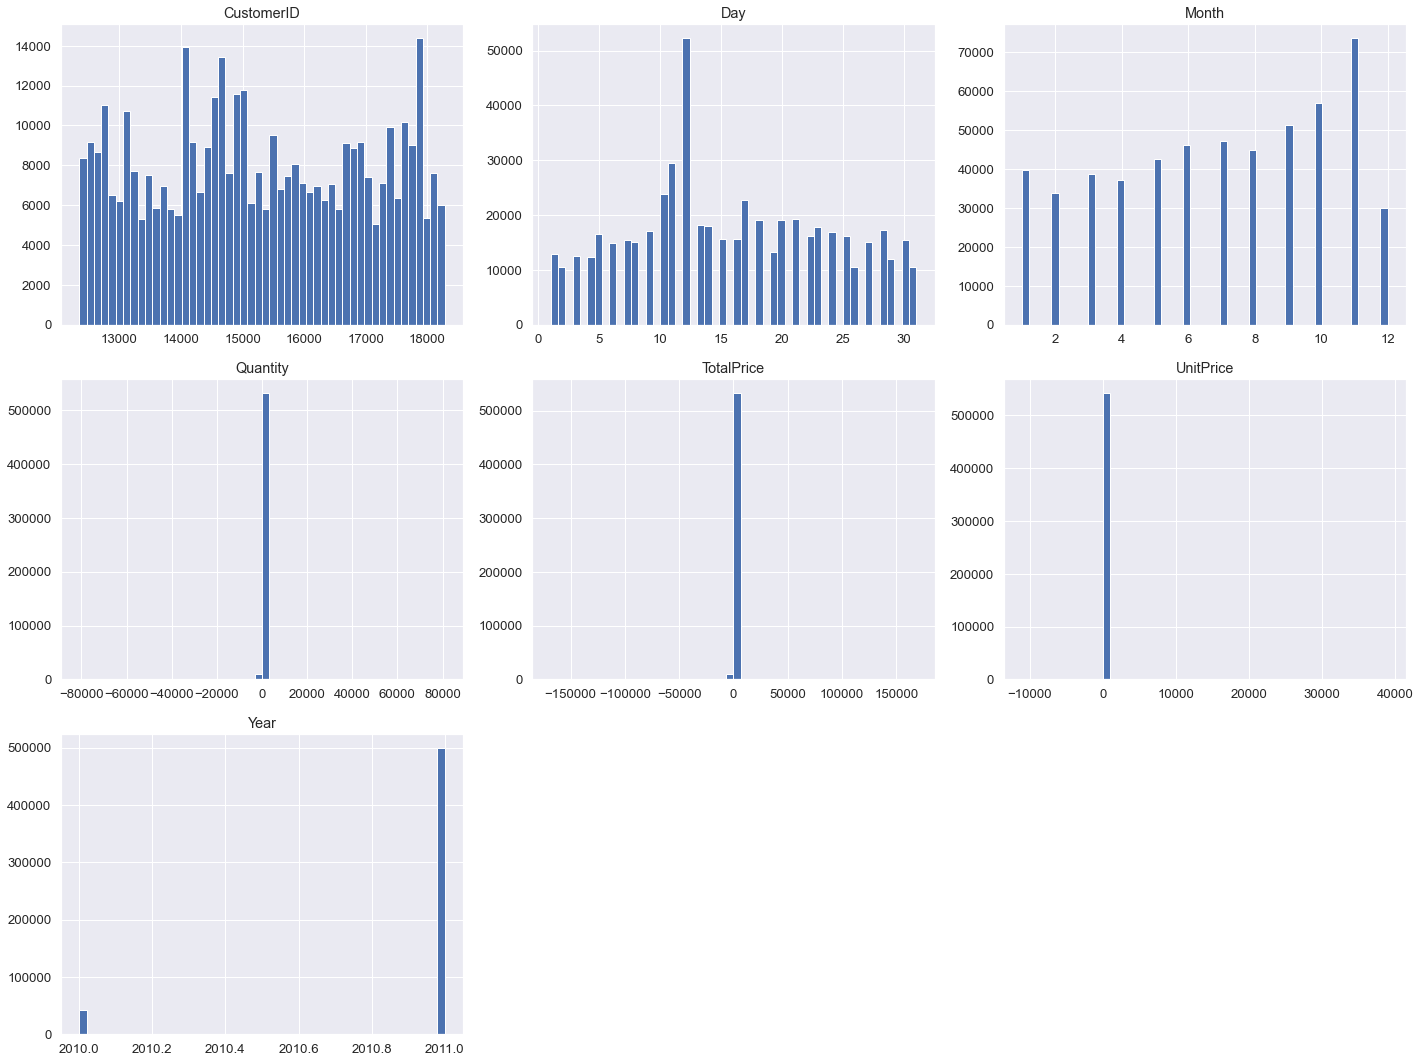

In [35]:
df.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

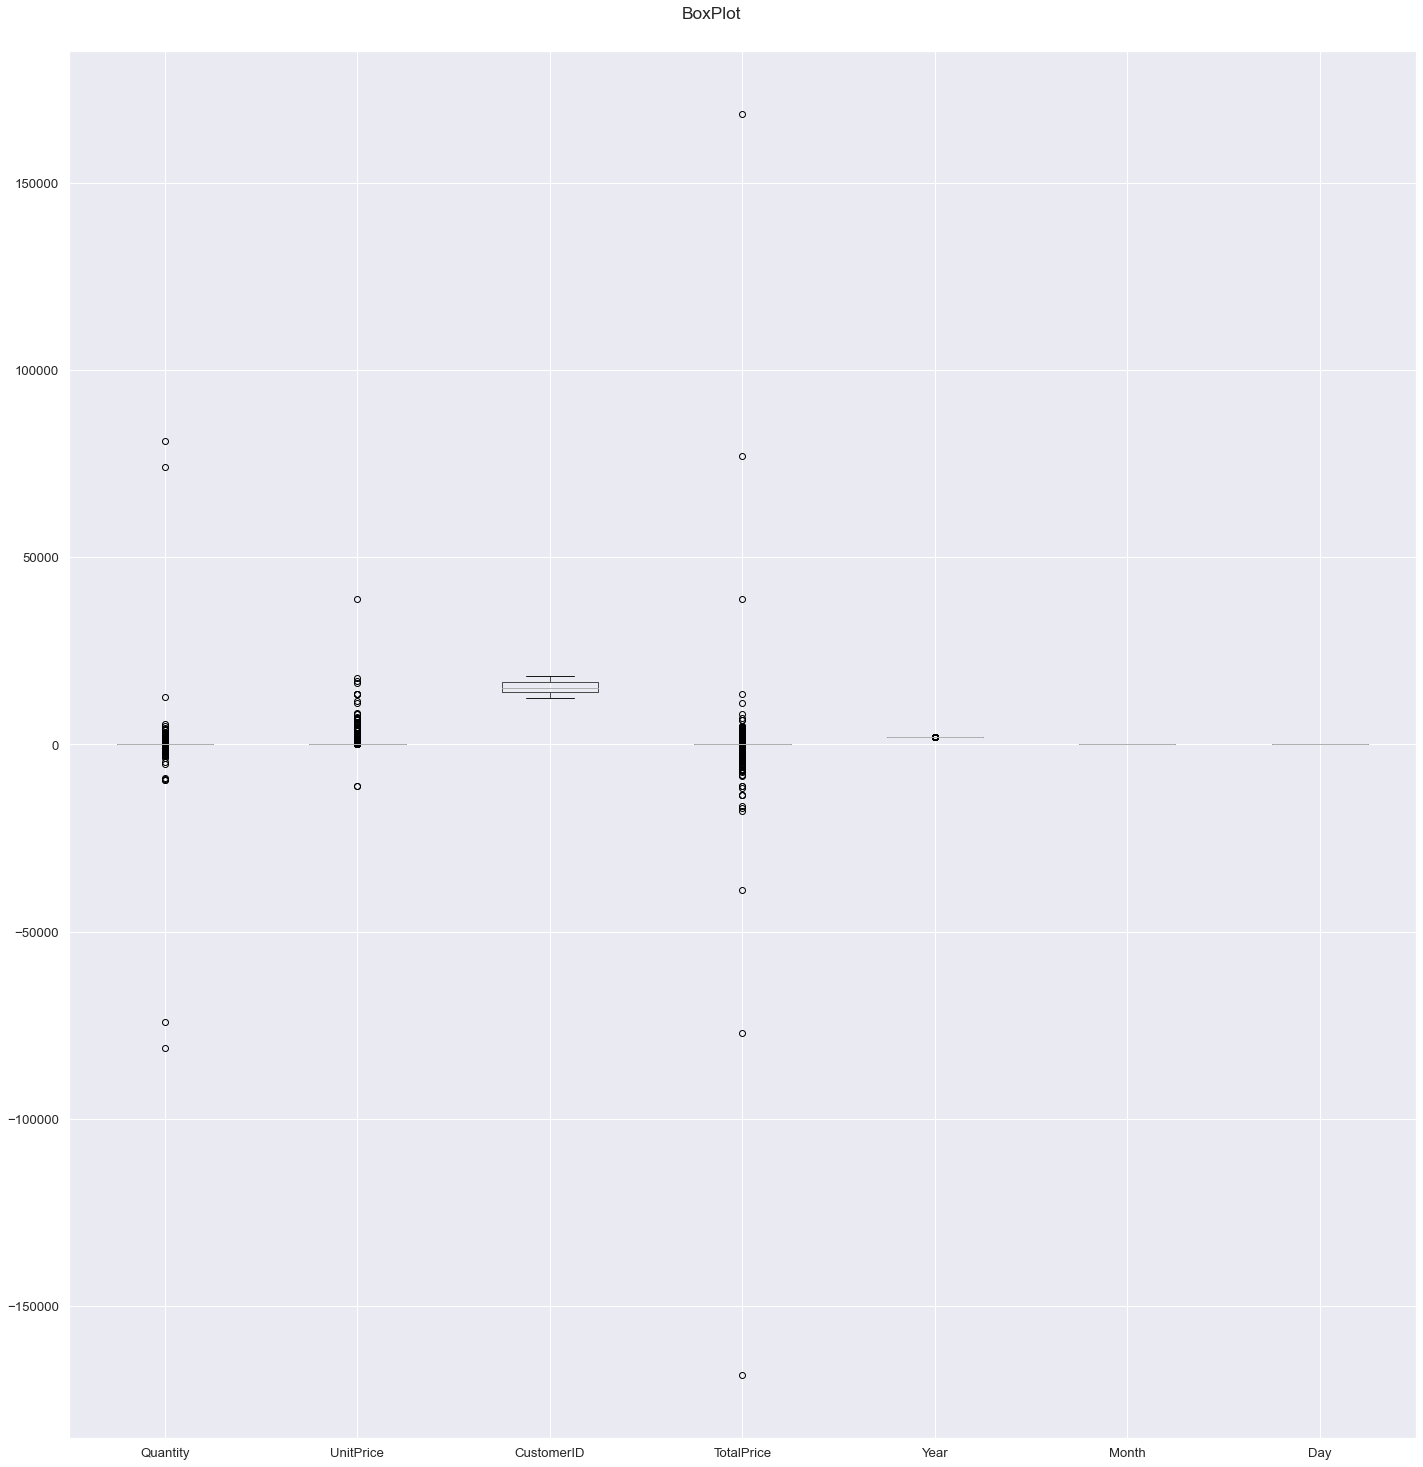

In [36]:
df.boxplot(figsize=(20,20))

plt.suptitle('BoxPlot', x=0.5, y=1.02, ha='center', fontsize='large')

plt.tight_layout()

plt.show()

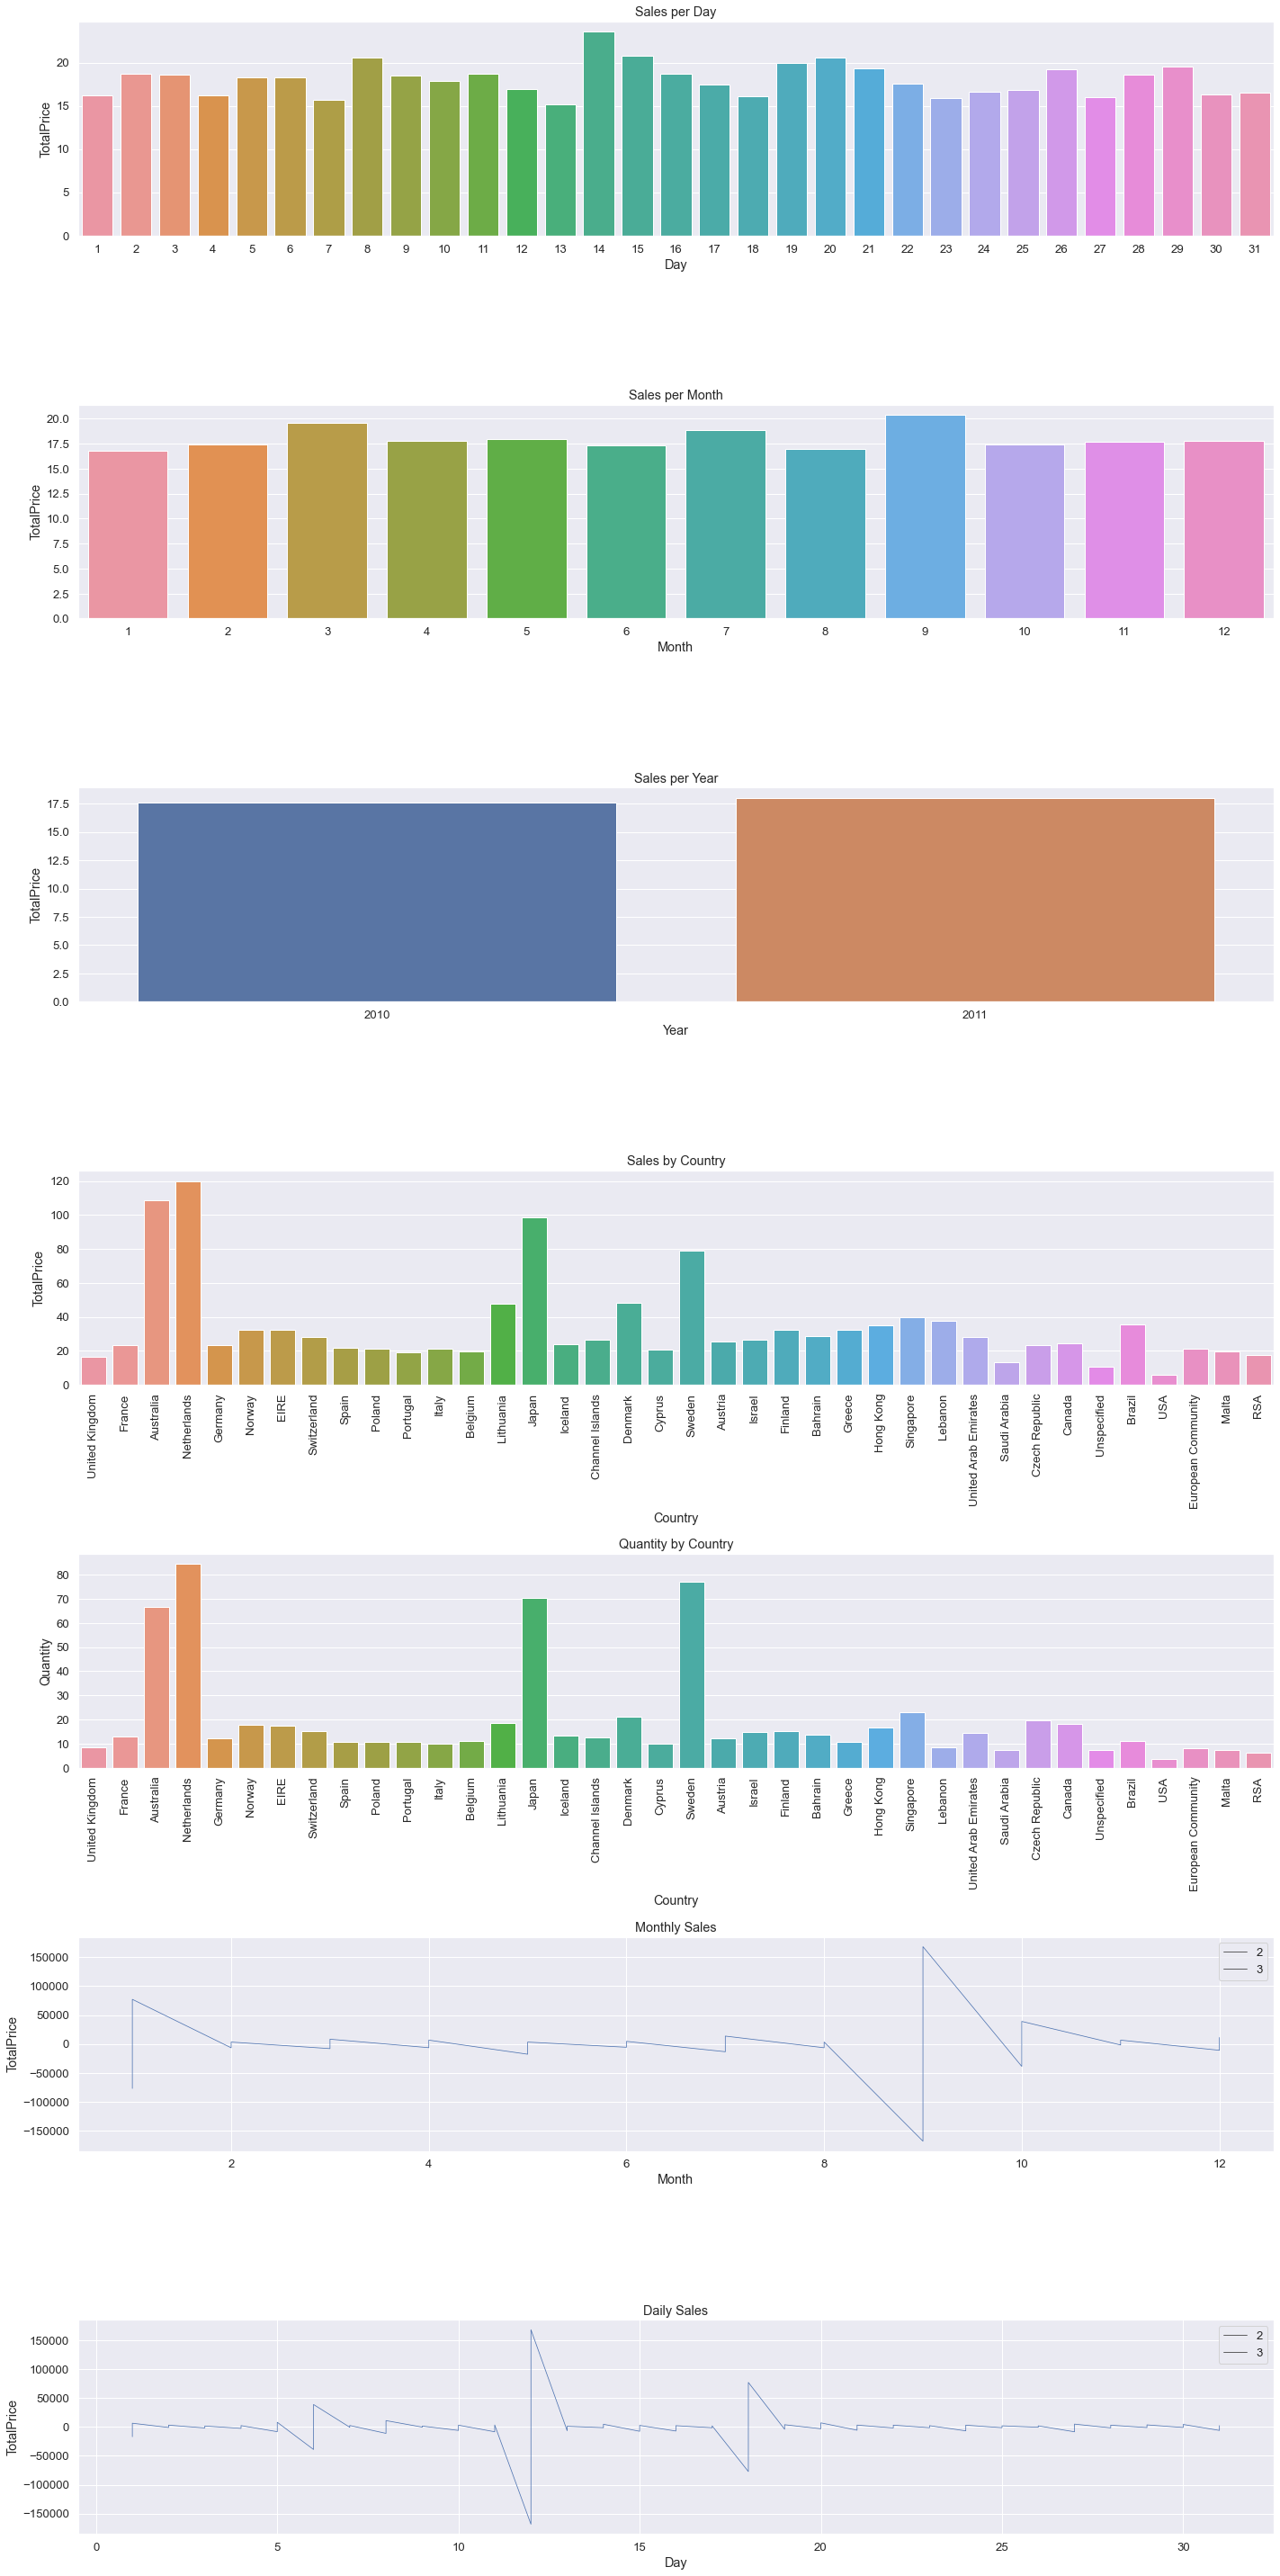

In [37]:
fig = plt.figure(figsize=(20,40))

plt.subplot(7,1,1)
plt.title("Sales per Day")
sns.barplot(x='Day', y="TotalPrice", data=df, ci=None)

plt.subplot(7,1,2)
plt.title("Sales per Month")
sns.barplot(x='Month', y="TotalPrice", data=df, ci=None)

plt.subplot(7,1,3)
plt.title("Sales per Year")
sns.barplot(x='Year', y="TotalPrice", data=df, ci=None)

plt.subplot(7,1,4)
plt.title("Sales by Country")
plt.xticks(rotation=90)
sns.barplot(x='Country', y="TotalPrice", data=df, ci=None)

plt.subplot(7,1,5)
plt.title("Quantity by Country")
plt.xticks(rotation=90)
sns.barplot(x='Country', y="Quantity", data=df, ci=None)

plt.subplot(7,1,6)
plt.title("Monthly Sales")
sns.lineplot(x='Month', y="TotalPrice", data=df, size=3, estimator=None)

plt.subplot(7,1,7)
plt.title("Daily Sales")
sns.lineplot(x='Day', y="TotalPrice", data=df, size=3, estimator=None)

# plt.subplot(7,1,8)
# plt.title("")
# sns.countplot()



plt.tight_layout()
plt.show()

### Bivariate Data Exploration

In [38]:
# sns.jointplot(x='', y='',data=df, kind='scatter')

# sns.jointplot(x='', y='',data=df, kind='scatter')

# sns.jointplot(x='', y='',data=df, kind='scatter')

# sns.jointplot(x='', y='',data=df, kind='scatter')

# sns.jointplot(x='', y='',data=df, kind='kde')

# sns.jointplot(x='', y='',data=df, kind='kde')

# sns.jointplot(x='', y='',data=df, kind='hex')

# sns.jointplot(x='', y='',data=df, kind='hex')

# sns.jointplot(x='', y='',data=df, kind='reg')

# sns.jointplot(x='', y='',data=df, kind='reg')


# plt.show()

### Correlation

In [39]:
df.corr()

,Quantity,UnitPrice,CustomerID,TotalPrice,Year,Month,Day
Quantity,1.000000,-0.001235,-0.003600,0.886681,0.002001,-0.000702,-0.000203
UnitPrice,-0.001235,1.000000,-0.004560,-0.162029,-0.004586,-0.000917,-0.002684
CustomerID,-0.003600,-0.004560,1.000000,-0.002274,-0.035955,0.006547,0.008392
TotalPrice,0.886681,-0.162029,-0.002274,1.000000,0.000275,0.000226,-0.000310
Year,0.002001,-0.004586,-0.035955,0.000275,1.000000,-0.119973,0.064791
Month,-0.000702,-0.000917,0.006547,0.000226,-0.119973,1.000000,0.055620
Day,-0.000203,-0.002684,0.008392,-0.000310,0.064791,0.055620,1.000000


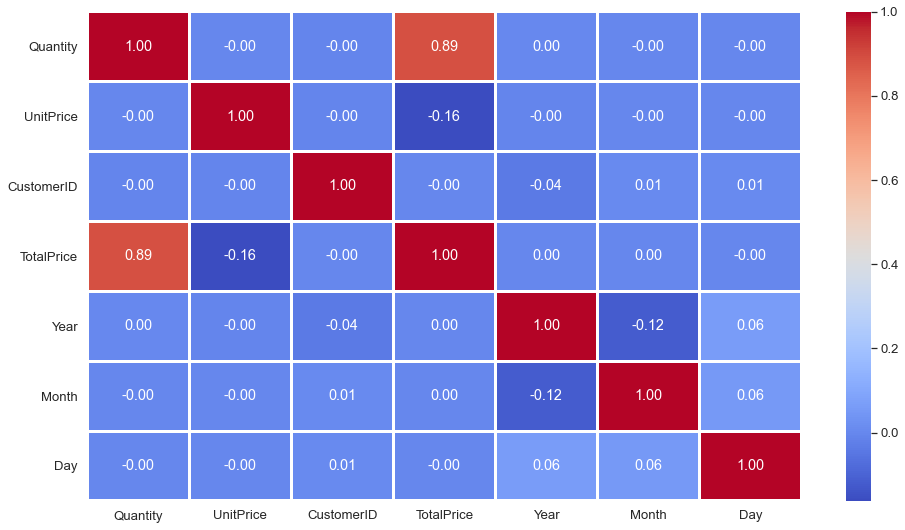

In [40]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

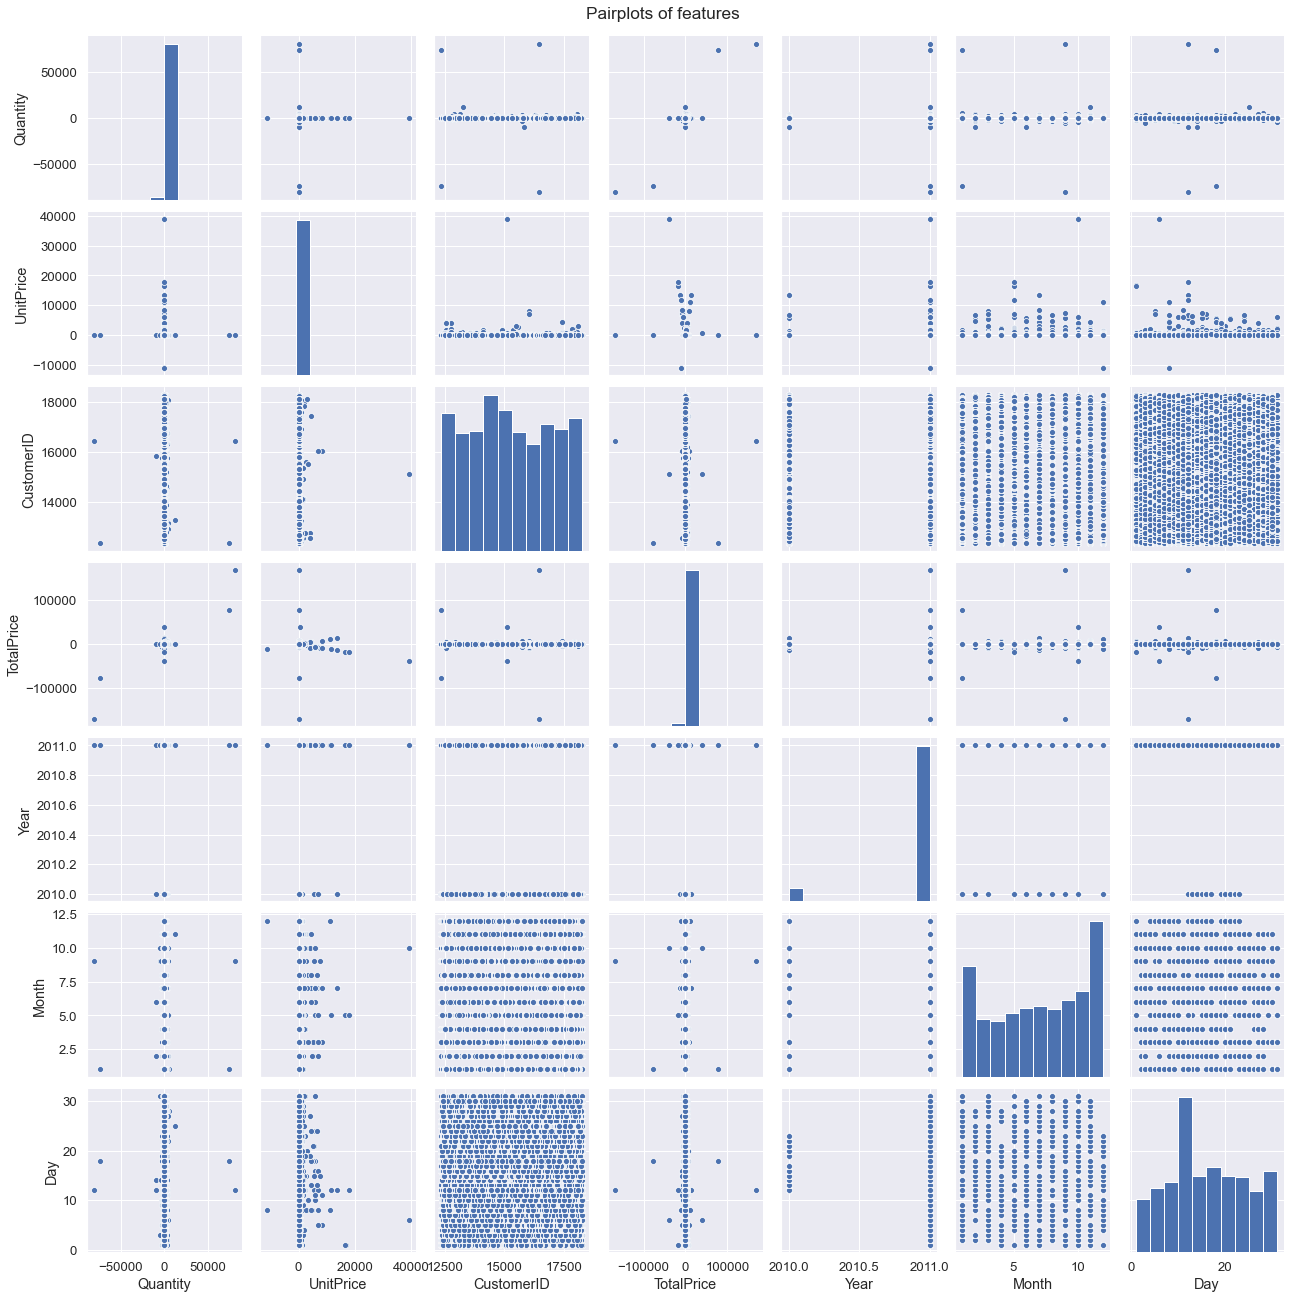

In [41]:
sns.pairplot(df)
plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize='large')
plt.show()

### Data Preprocessing

### Drop unwanted features

In [42]:
df = pd.read_csv("retail.csv")

In [43]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Date,Year,Month,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-01-12,2010,1,12
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-01-12,2010,1,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-01-12,2010,1,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-01-12,2010,1,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-01-12,2010,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,12680.0,France,10.20,2011-09-12,2011,9,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,12680.0,France,12.60,2011-09-12,2011,9,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,12680.0,France,16.60,2011-09-12,2011,9,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,12680.0,France,16.60,2011-09-12,2011,9,12


In [44]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country', 'TotalPrice', 'Date', 'Year', 'Month', 'Day'], dtype='object')

In [45]:
df.drop(['Description','InvoiceDate','UnitPrice','Country','Date'],axis=1,inplace=True)

In [46]:
df

,InvoiceNo,StockCode,Quantity,CustomerID,TotalPrice,Year,Month,Day
0,536365,85123A,6,17850.0,15.30,2010,1,12
1,536365,71053,6,17850.0,20.34,2010,1,12
2,536365,84406B,8,17850.0,22.00,2010,1,12
3,536365,84029G,6,17850.0,20.34,2010,1,12
4,536365,84029E,6,17850.0,20.34,2010,1,12
...,...,...,...,...,...,...,...,...
541904,581587,22613,12,12680.0,10.20,2011,9,12
541905,581587,22899,6,12680.0,12.60,2011,9,12
541906,581587,23254,4,12680.0,16.60,2011,9,12
541907,581587,23255,4,12680.0,16.60,2011,9,12


### Treat Missing Values

In [47]:
df.isnull().sum()

InvoiceNo          0
StockCode          0
Quantity           0
CustomerID    135080
TotalPrice         0
Year               0
Month              0
Day                0
dtype: int64

In [48]:
df['CustomerID'] = df['CustomerID'].replace(np.nan,99999.0) # Replace with a number to denote missing value

In [49]:
df.isnull().sum()

InvoiceNo     0
StockCode     0
Quantity      0
CustomerID    0
TotalPrice    0
Year          0
Month         0
Day           0
dtype: int64

In [50]:
df.describe()

,Quantity,CustomerID,TotalPrice,Year,Month,Day
count,541909.000000,541909.000000,541909.000000,541909.000000,541909.000000,541909.000000
mean,9.552250,36403.419738,17.987795,2010.921609,6.919828,15.656396
std,218.081158,36675.250481,378.810824,0.268787,3.363659,8.111820
min,-80995.000000,12346.000000,-168469.600000,2010.000000,1.000000,1.000000
25%,1.000000,14367.000000,3.400000,2011.000000,4.000000,10.000000
50%,3.000000,16249.000000,9.750000,2011.000000,7.000000,15.000000
75%,10.000000,18283.000000,17.400000,2011.000000,10.000000,22.000000
max,80995.000000,99999.000000,168469.600000,2011.000000,12.000000,31.000000


In [51]:
df.groupby("CustomerID").sum()  #Not suitable

,Quantity,TotalPrice,Year,Month,Day
CustomerID,,,,,
12346.0,0,0.00,4022,2,36
12347.0,2458,4310.00,365971,1167,3095
12348.0,2341,1797.24,62324,262,517
12349.0,631,1757.55,146803,803,1533
12350.0,197,334.40,34187,34,34
...,...,...,...,...,...
18281.0,54,80.82,14077,84,42
18282.0,98,176.60,26143,54,124
18283.0,1397,2094.88,1520316,5240,14039


### Create a new dataset

In [52]:
table1 = pd.pivot_table(data=df,index=['StockCode'], aggfunc='sum')
table1

,CustomerID,Day,Month,Quantity,TotalPrice,Year
StockCode,,,,,,
10002,3123818.0,1059,361,1037,759.89,146773
10080,633011.0,402,175,495,119.09,48264
10120,484879.0,462,176,193,40.53,60326
10123C,146700.0,61,17,-13,3.25,8043
10123G,99999.0,4,8,-38,0.00,2011
...,...,...,...,...,...,...
gift_0001_20,999990.0,165,48,20,167.05,20110
gift_0001_30,799992.0,144,42,37,175.53,16088
gift_0001_40,299997.0,51,23,3,100.70,6032


In [53]:
table2 = pd.pivot_table(data=df,index=['StockCode'], aggfunc='count')
table2

,CustomerID,Day,InvoiceNo,Month,Quantity,TotalPrice,Year
StockCode,,,,,,,
10002,73,73,73,73,73,73,73
10080,24,24,24,24,24,24,24
10120,30,30,30,30,30,30,30
10123C,4,4,4,4,4,4,4
10123G,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...
gift_0001_20,10,10,10,10,10,10,10
gift_0001_30,8,8,8,8,8,8,8
gift_0001_40,3,3,3,3,3,3,3


In [54]:
table3 = pd.pivot_table(data=df,index=['StockCode'], aggfunc='mean')
table3

,CustomerID,Day,Month,Quantity,TotalPrice,Year
StockCode,,,,,,
10002,42792.027397,14.506849,4.945205,14.205479,10.409452,2010.589041
10080,26375.458333,16.750000,7.291667,20.625000,4.962083,2011.000000
10120,16162.633333,15.400000,5.866667,6.433333,1.351000,2010.866667
10123C,36675.000000,15.250000,4.250000,-3.250000,0.812500,2010.750000
10123G,99999.000000,4.000000,8.000000,-38.000000,0.000000,2011.000000
...,...,...,...,...,...,...
gift_0001_20,99999.000000,16.500000,4.800000,2.000000,16.705000,2011.000000
gift_0001_30,99999.000000,18.000000,5.250000,4.625000,21.941250,2011.000000
gift_0001_40,99999.000000,17.000000,7.666667,1.000000,33.566667,2010.666667


In [55]:
table1.drop(['CustomerID','Year'],axis=1,inplace=True)

In [56]:
table1

,Day,Month,Quantity,TotalPrice
StockCode,,,,
10002,1059,361,1037,759.89
10080,402,175,495,119.09
10120,462,176,193,40.53
10123C,61,17,-13,3.25
10123G,4,8,-38,0.00
...,...,...,...,...
gift_0001_20,165,48,20,167.05
gift_0001_30,144,42,37,175.53
gift_0001_40,51,23,3,100.70


In [57]:
table1.rename(columns={'Day':'DaySum', 'Month':'MonthSum', 'Quantity':'QuantitySum', 'TotalPrice':'TotalPriceSum'}, inplace=True)

In [58]:
table1

,DaySum,MonthSum,QuantitySum,TotalPriceSum
StockCode,,,,
10002,1059,361,1037,759.89
10080,402,175,495,119.09
10120,462,176,193,40.53
10123C,61,17,-13,3.25
10123G,4,8,-38,0.00
...,...,...,...,...
gift_0001_20,165,48,20,167.05
gift_0001_30,144,42,37,175.53
gift_0001_40,51,23,3,100.70


In [59]:
table2

,CustomerID,Day,InvoiceNo,Month,Quantity,TotalPrice,Year
StockCode,,,,,,,
10002,73,73,73,73,73,73,73
10080,24,24,24,24,24,24,24
10120,30,30,30,30,30,30,30
10123C,4,4,4,4,4,4,4
10123G,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...
gift_0001_20,10,10,10,10,10,10,10
gift_0001_30,8,8,8,8,8,8,8
gift_0001_40,3,3,3,3,3,3,3


In [60]:
table2.columns

Index(['CustomerID', 'Day', 'InvoiceNo', 'Month', 'Quantity', 'TotalPrice', 'Year'], dtype='object')

In [61]:
table2.drop(['Day', 'InvoiceNo', 'Month', 'Quantity', 'TotalPrice', 'Year'],axis=1,inplace=True)

In [62]:
table2

,CustomerID
StockCode,
10002,73
10080,24
10120,30
10123C,4
10123G,1
...,...
gift_0001_20,10
gift_0001_30,8
gift_0001_40,3


In [63]:
table2.rename(columns={'CustomerID':'CustomerCount'}, inplace=True)

In [64]:
table2

,CustomerCount
StockCode,
10002,73
10080,24
10120,30
10123C,4
10123G,1
...,...
gift_0001_20,10
gift_0001_30,8
gift_0001_40,3


In [65]:
table3

,CustomerID,Day,Month,Quantity,TotalPrice,Year
StockCode,,,,,,
10002,42792.027397,14.506849,4.945205,14.205479,10.409452,2010.589041
10080,26375.458333,16.750000,7.291667,20.625000,4.962083,2011.000000
10120,16162.633333,15.400000,5.866667,6.433333,1.351000,2010.866667
10123C,36675.000000,15.250000,4.250000,-3.250000,0.812500,2010.750000
10123G,99999.000000,4.000000,8.000000,-38.000000,0.000000,2011.000000
...,...,...,...,...,...,...
gift_0001_20,99999.000000,16.500000,4.800000,2.000000,16.705000,2011.000000
gift_0001_30,99999.000000,18.000000,5.250000,4.625000,21.941250,2011.000000
gift_0001_40,99999.000000,17.000000,7.666667,1.000000,33.566667,2010.666667


In [66]:
table3.columns

Index(['CustomerID', 'Day', 'Month', 'Quantity', 'TotalPrice', 'Year'], dtype='object')

In [67]:
table3.drop(['CustomerID', 'TotalPrice', 'Year'],axis=1,inplace=True)

In [68]:
table3

,Day,Month,Quantity
StockCode,,,
10002,14.506849,4.945205,14.205479
10080,16.750000,7.291667,20.625000
10120,15.400000,5.866667,6.433333
10123C,15.250000,4.250000,-3.250000
10123G,4.000000,8.000000,-38.000000
...,...,...,...
gift_0001_20,16.500000,4.800000,2.000000
gift_0001_30,18.000000,5.250000,4.625000
gift_0001_40,17.000000,7.666667,1.000000


In [69]:
table3.rename(columns={'Day':'DayAvg', 'Month':'MonthAvg', 'Quantity':'QuantityAvg'}, inplace=True)

In [70]:
table3

,DayAvg,MonthAvg,QuantityAvg
StockCode,,,
10002,14.506849,4.945205,14.205479
10080,16.750000,7.291667,20.625000
10120,15.400000,5.866667,6.433333
10123C,15.250000,4.250000,-3.250000
10123G,4.000000,8.000000,-38.000000
...,...,...,...
gift_0001_20,16.500000,4.800000,2.000000
gift_0001_30,18.000000,5.250000,4.625000
gift_0001_40,17.000000,7.666667,1.000000


### Combine tables

In [71]:
dfnew = pd.concat([table1,table2,table3],axis=1)

In [72]:
dfnew

,DaySum,MonthSum,QuantitySum,TotalPriceSum,CustomerCount,DayAvg,MonthAvg,QuantityAvg
StockCode,,,,,,,,
10002,1059,361,1037,759.89,73,14.506849,4.945205,14.205479
10080,402,175,495,119.09,24,16.750000,7.291667,20.625000
10120,462,176,193,40.53,30,15.400000,5.866667,6.433333
10123C,61,17,-13,3.25,4,15.250000,4.250000,-3.250000
10123G,4,8,-38,0.00,1,4.000000,8.000000,-38.000000
...,...,...,...,...,...,...,...,...
gift_0001_20,165,48,20,167.05,10,16.500000,4.800000,2.000000
gift_0001_30,144,42,37,175.53,8,18.000000,5.250000,4.625000
gift_0001_40,51,23,3,100.70,3,17.000000,7.666667,1.000000


In [73]:
dfnew.reset_index(drop=True, inplace=True)

In [74]:
dfnew

,DaySum,MonthSum,QuantitySum,TotalPriceSum,CustomerCount,DayAvg,MonthAvg,QuantityAvg
0,1059,361,1037,759.89,73,14.506849,4.945205,14.205479
1,402,175,495,119.09,24,16.750000,7.291667,20.625000
2,462,176,193,40.53,30,15.400000,5.866667,6.433333
3,61,17,-13,3.25,4,15.250000,4.250000,-3.250000
4,4,8,-38,0.00,1,4.000000,8.000000,-38.000000
...,...,...,...,...,...,...,...,...
4065,165,48,20,167.05,10,16.500000,4.800000,2.000000
4066,144,42,37,175.53,8,18.000000,5.250000,4.625000
4067,51,23,3,100.70,3,17.000000,7.666667,1.000000
4068,82,30,4,167.56,4,20.500000,7.500000,1.000000


In [75]:
#dfnew.to_csv("retailnew.csv",index=False)